In [1]:
suppressMessages({
library(ggplot2)
library(reshape2)
library(argparser)
library(Seurat)
#library(corrplot)
library(dplyr)
library(grid)
library(cowplot)
library(dplyr)
library(grid)
library(tidyverse)
})
library(SeuratObject)

Warning message:
“package ‘argparser’ was built under R version 4.0.5”
Warning message:
“package ‘Seurat’ was built under R version 4.0.5”


In [ ]:
sessionInfo("Seurat")

In [15]:
rds = readRDS("/SGRNJ06/randd/lims_result_rd/MultiResult/RD20102301_221018_homo_PBMC/2022-10-19/h79dis3ues/father_cluster/batch_1/call-integration/RD20102301_221018_homo_PBMC.diff_PRO.rds")

In [16]:
meta = rds@meta.data

In [17]:
head(meta)

,orig.ident,nCount_RNA,nFeature_RNA,sample,group,reportname,platform,percent.mt,cluster,raw_cluster,louvain,seurat_cluster
,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>,<chr>,<dbl>,<fct>,<fct>,<chr>,<chr>
GC_0_AAACATCGAAACATCGCCTCCTGA,GC,12901,3741,GC_0,GC_0,GC_0,A,6.898690,CD8Teff,4,4,4
GC_0_AAACATCGAAACATCGGCCAAGAC,GC,10189,3114,GC_0,GC_0,GC_0,A,10.481893,CD8Teff,7,7,7
GC_0_AAACATCGAAACATCGTGAAGAGA,GC,16602,3886,GC_0,GC_0,GC_0,A,12.823756,NaiveT,13,13,13
GC_0_AAACATCGAACAACCAAGAGTCAA,GC,18642,4588,GC_0,GC_0,GC_0,A,7.617208,CD8Teff,4,4,4
GC_0_AAACATCGAACCGAGAACCTCCAA,GC,10468,3304,GC_0,GC_0,GC_0,A,8.760031,CD8Teff,11,11,11
GC_0_AAACATCGAACGTGATATCCTGTA,GC,45668,6880,GC_0,GC_0,GC_0,A,8.999738,NaiveT,12,12,12


In [ ]:
  Idents(rds) <- "sample"
  rds <- subset(rds,idents = c("GC_0"))
  rds <-  NormalizeData(object = rds)
  rds <-  ScaleData(object = rds)
  rds <- FindVariableFeatures(object = rds)
  genes.use<- head(HVFInfo(object = rds),2000)
  rds <- RunPCA(object=rds,features = VariableFeatures(object = rds))
  rds <- FindNeighbors(rds, reduction = "pca", dims = 1:20)
  rds <- FindClusters(rds,resolution = 1.2, algorithm = 1)
  rds <- RunTSNE(object=rds,dims.use=1:20,do.fast=TRUE,check_duplicates = FALSE)
  rds <- RunUMAP(rds, reduction = "pca", dims = 1:20)
  saveRDS(object = rds, file = "/SGRNJ06/randd/USER/cjj/celedev/XZMU/20221107qupiciGC0/CJJcele/GC0qupici.rds")

In [45]:
head(rds@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sample,group,reportname,platform,percent.mt,cluster,raw_cluster,louvain,seurat_cluster,RNA_snn_res.1.2,seurat_clusters
,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>,<chr>,<dbl>,<fct>,<fct>,<chr>,<chr>,<fct>,<fct>
GC_0_AAACATCGAAACATCGCCTCCTGA,GC,12901,3741,GC_0,GC_0,GC_0,A,6.898690,CD8Teff,4,4,4,8,8
GC_0_AAACATCGAAACATCGGCCAAGAC,GC,10189,3114,GC_0,GC_0,GC_0,A,10.481893,CD8Teff,7,7,7,1,1
GC_0_AAACATCGAAACATCGTGAAGAGA,GC,16602,3886,GC_0,GC_0,GC_0,A,12.823756,NaiveT,13,13,13,0,0
GC_0_AAACATCGAACAACCAAGAGTCAA,GC,18642,4588,GC_0,GC_0,GC_0,A,7.617208,CD8Teff,4,4,4,8,8
GC_0_AAACATCGAACCGAGAACCTCCAA,GC,10468,3304,GC_0,GC_0,GC_0,A,8.760031,CD8Teff,11,11,11,8,8
GC_0_AAACATCGAACGTGATATCCTGTA,GC,45668,6880,GC_0,GC_0,GC_0,A,8.999738,NaiveT,12,12,12,7,7


In [20]:
table(rds@meta.data$seurat_clusters)


  0   1   2   3   4   5   6   7   8   9  10  11  12 
840 706 705 611 601 567 501 470 461 385 345 289 253 

In [21]:
subc<-levels(x=rds@active.ident)

In [22]:
for (l in subc){
   cluster.markers <- FindMarkers(object=rds,ident.1=l,min.pct=0.1,logfc.threshold = 0.25)
   write.table(cluster.markers,file=paste('/SGRNJ06/randd/USER/cjj/celedev/XZMU/20221107qupiciGC0/CJJcele','/',l,'_diffgenes.xls',sep=''),sep='\t',quote=F,row.names=T)}
dev.off()


null device 
          1

In [61]:
# rds = readRDS("/SGRNJ06/randd/lims_result_rd/MultiResult/RD20102301_221018_homo_PBMC/2022-10-19/h79dis3ues/father_cluster/batch_1/call-integration/RD20102301_221018_homo_PBMC.diff_PRO.rds")
Tcells = readRDS("/SGRNJ06/randd/USER/cjj/celedev/XZMU/20221107qupiciGC0/CJJcele/V4toV3/GC0_v4_to_v3.rds")

In [62]:
table(Tcells@meta.data$seurat_clusters)


  0   1   2   3   4   5   6   7   8   9  10  11  12 
840 706 705 611 601 567 501 470 461 385 345 289 253 

In [56]:
new.cluster.ids <- c('NaiveT','CD8Teff','HelperT','HelperT','CD8Teff','NaiveT','CD8Teff','NaiveT','CD8Teff','LowQuality','NaiveT','HelperT','CD8Teff')
names(new.cluster.ids) <- levels(Tcells)
Tcells <- RenameIdents(Tcells, new.cluster.ids)
Tcells <- StashIdent(object = Tcells, save.name = "cluster")

With Seurat 3.X, stashing identity classes can be accomplished with the following:
Tcells[["cluster"]] <- Idents(object = Tcells)



In [57]:
Idents(Tcells) <- 'cluster'
Tcells <- subset(Tcells,idents = c('HelperT','NaiveT','CD8Teff'))

In [7]:
rds$cluster <- as.character(rds$cluster)
Tcells$cluster <- as.character(Tcells$cluster)
rds$cluster[ colnames(rds) %in% colnames(Tcells)[ Tcells$cluster == "CD8Teff"]] = "CD8Teff"
rds$cluster[ colnames(rds) %in% colnames(Tcells)[ Tcells$cluster == "NaiveT"]] = "NaiveT"
rds$cluster[ colnames(rds) %in% colnames(Tcells)[ Tcells$cluster == "HelperT"]] = "HelperT"

In [11]:
p = UMAPPlot(rds, group.by='cluster', pt.size=0.5)

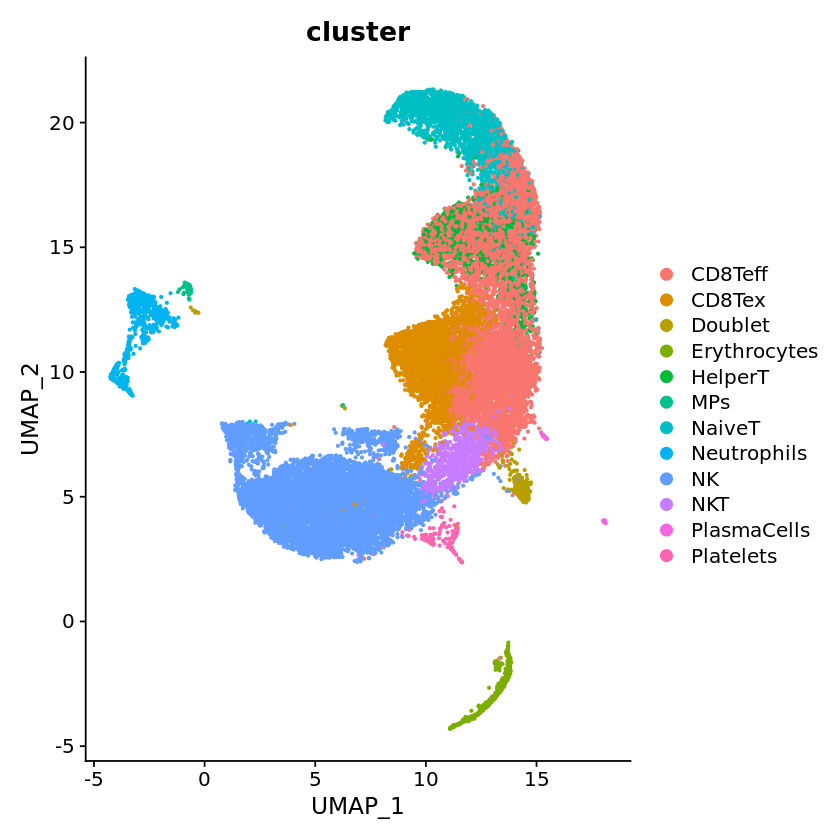

In [12]:
p

In [13]:
ggsave("/SGRNJ06/randd/USER/cjj/celedev/XZMU/20221107qupiciGC0/yingshe.png",p,width = 10, height=10)

In [29]:
p = UMAPPlot(Tcells, group.by='cluster', pt.size=0.5)

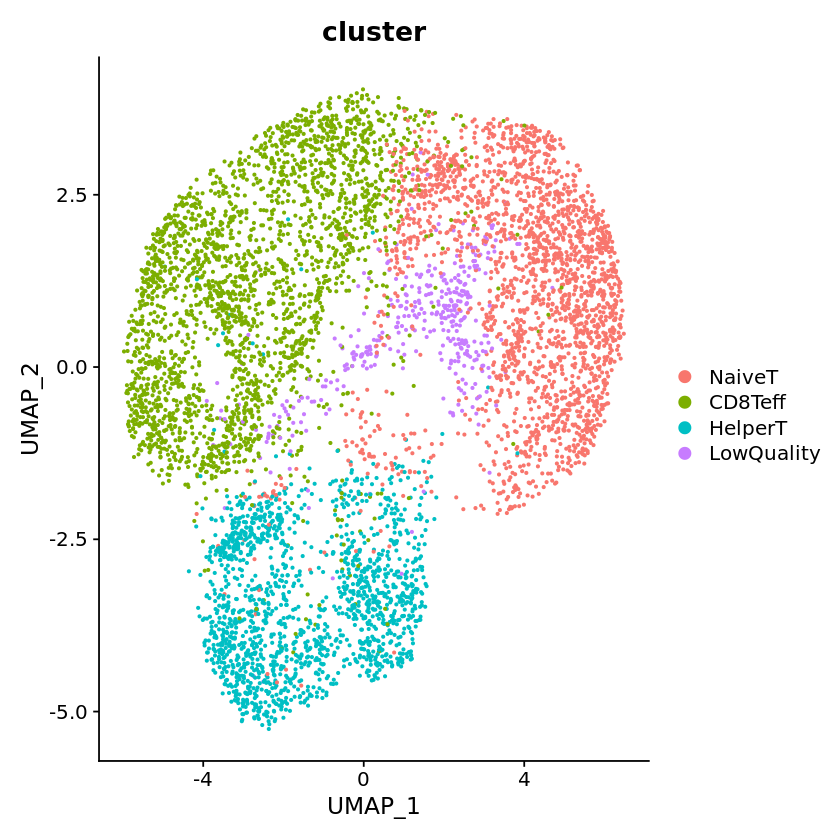

In [30]:
p

In [31]:
ggsave("/SGRNJ06/randd/USER/cjj/celedev/XZMU/20221107qupiciGC0/GC0_lowq.png",p,width = 10, height=10)

In [53]:
#P = FeaturePlot(Tcells,features =c("CD3D","CD8A","CD8B","NKG7","GZMA"),cols=c("lightgrey","red"))
#P = FeaturePlot(Tcells,features =c("CD3D","CD4","CCR7","TCF7"),cols=c("lightgrey","red"))
P = FeaturePlot(Tcells,features =c("CD3D","CD4","CD40LG","IL26","RORC","IFNG","TNF","TNFRSF4","TNFSF8"),cols=c("lightgrey","red"))
ggsave("/SGRNJ06/randd/USER/cjj/celedev/XZMU/20221107qupiciGC0/fp_Thelper.png",P,width = 10, height=10)

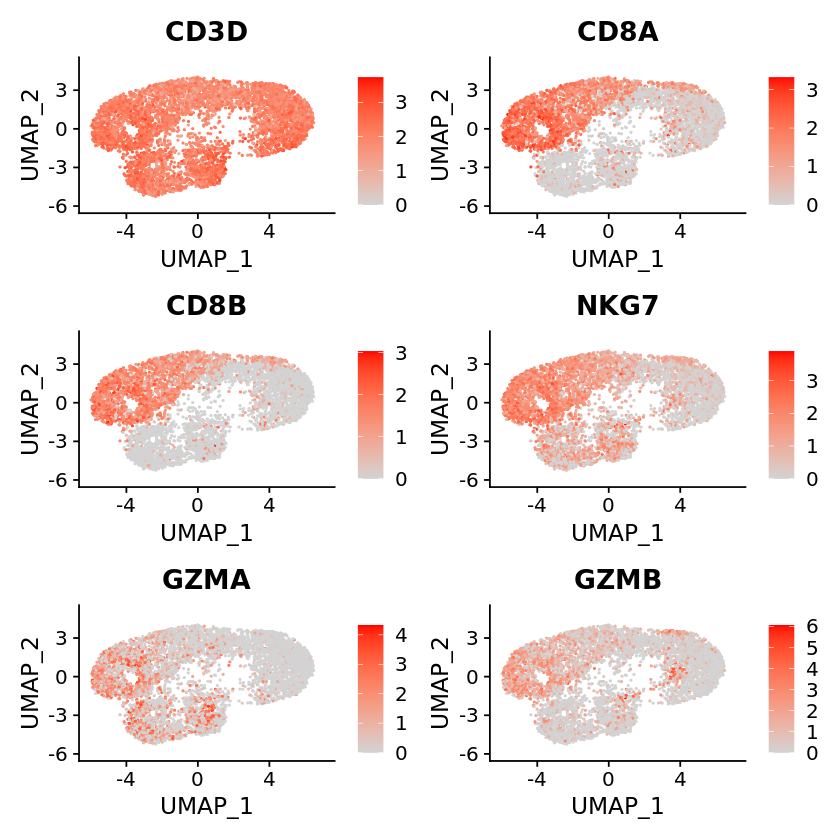

In [50]:
FeaturePlot(Tcells,features =c("CD3D","CD8A","CD8B","NKG7","GZMA","GZMB"),cols=c("lightgrey","red"))

In [65]:
p = UMAPPlot(Tcells, group.by='seurat_clusters', pt.size=0.5)

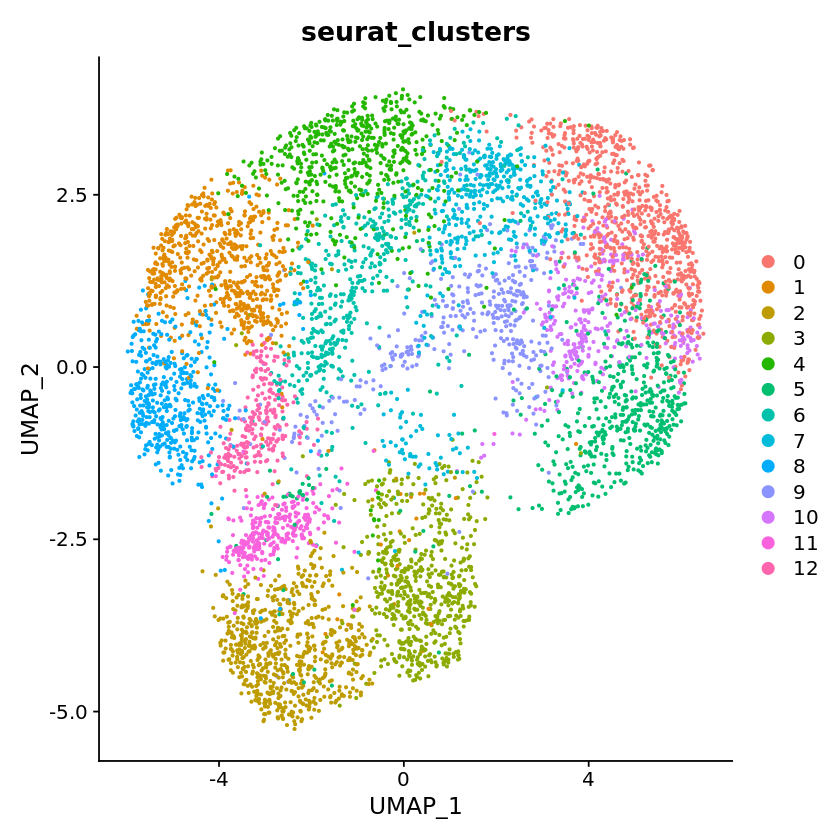

In [66]:
p

In [67]:
ggsave("/SGRNJ06/randd/USER/cjj/celedev/XZMU/20221107qupiciGC0/GC0_rawcluster.png",p,width = 10, height=10)

In [41]:
rds$cluster <- as.character(rds$cluster)
Tcells$cluster <- as.character(Tcells$cluster)

In [ ]:
Tcells$cluster

In [ ]:
rds$cluster[ colnames(rds) %in% colnames(Tcells)[ Tcells$cluster == "CD8Teff"]] = "CD8Teff"
rds$cluster[ colnames(rds) %in% colnames(Tcells)[ Tcells$cluster == "NaiveT"]] = "NaiveT"
rds$cluster[ colnames(rds) %in% colnames(Tcells)[ Tcells$cluster == "HelperT"]] = "HelperT"

In [48]:
rds$cluster[ colnames(rds) %in% colnames(Tcells)[ Tcells$cluster == "HelperT"]]= "HelperT"

In [ ]:
rds$cluster[ colnames(rds) %in% colnames(Tcells)[ Tcells$cluster == "HelperT"]]